## Image watermarking using computer vision

In this article, we will be making an image watermarking application before moving forward with the technicalities let us understand what is the business use case for the same. So when it comes to the importance of image watermarking it has a wide role in protecting the documents from unwanted use (copyright infringement) also if the proper pipeline is there for the same application then we can also save a lot of time as there would be the bulk of documents which needs to be watermarked.

### Use case of Image watermarking

Though we are building an application to watermark any image but do we know any business use case for it? So let's first look at that:
1. Adding the watermark helps in maintaining the legal rights of your company so that other people or organizations won't use that without any concern and no copyright issue should strike unnecessarily.
2. This application will also help in automation as we all know that if we will add a watermark in every image manually then it would take a lot of time hence, this application will help in automating the whole process which in turn saves a lot of time.

Note: Before moving forward to the coding part, Personally I'm using the Jupyter notebook for writing the code for the following reasons:
1. We can run every chunk of code separately which will let us understand what each chunk of code is doing without any kind of debugging.
2. Code + comment approach i.e. we can write code and at the same time document that code as well.


Having said that you are free to use any code editor of your own choice (the Jupyter notebook is preferable).

Firstly we will be importing all the required libraries

In [1]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

Let's break down the use of each library that we have imported.

1. cv2: This library is to import all the built-in functions that are supported under computer vision and do all the image processing operations.
2. NumPy: This library is imported for doing some required mathematical calculations and some color conversion.
3. requests: This library will be used to fetch the image from the web so that we can use any image as per our requirements
4. PIL: Also known as pillow library which will help to open the image that we will retrieve from the web.

For this project, we need an image URL on which we will apply a watermark. We will load the image using the URL of the image from google images. You can use any image that you desire and replace the URL of the image with the current URL. Next, we will read and resize the image and finally store it into two variables for logo and text watermarking.

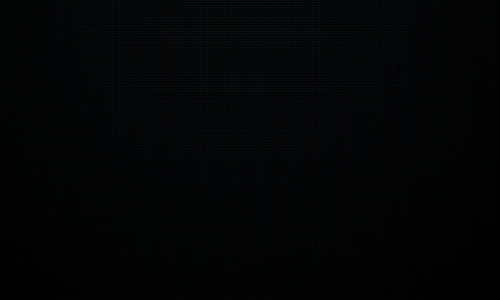

In [2]:
# Reading image form url
image = Image.open(requests.get('https://wallpaperbat.com/img/515088-pure-oled-black-wallpaper.jpg', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow
# https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png

For the logo, we are using the CVS pharmacy logo which is downloaded using the above URL.

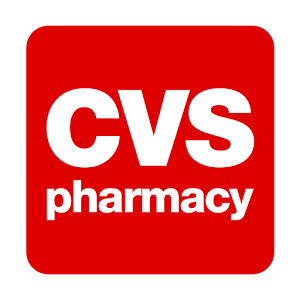

In [4]:
# Reading logo form url
logow = Image.open(requests.get('https://www.kark.com/wp-content/uploads/sites/85/2016/03/cvs_1457227446363_7369586_ver1.0.png', stream=True).raw)
# logow = logo.resize((209,52))
# logow = cv2.imread('https://www.kark.com/wp-content/uploads/sites/85/2016/03/cvs_1457227446363_7369586_ver1.0.png')
logow
# https://www.kark.com/wp-content/uploads/sites/85/2016/03/cvs_1457227446363_7369586_ver1.0.png
# https://www.logogenie.net/download/preview/medium/9995302

To use these images, we will first convert them into RGB format and store them as a NumPy array but here the question is why we need to convert the image to RGB format the reason behind this is RGB has three color channels which in all combination gives us the colored image instead of the black and white image. Similarly, we will also extract the shape i.e. its height and width. 

In [5]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logow = np.array(logow.convert('RGB'))
h_logo, w_logo, _ = logow.shape

We will place our watermark in the center of the image so that we need to calculate the center of the image. Here, we will find out the center coordinates of the image using the height and width of the image. 

In [6]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

A Region of Interest is defined as the area we need to place our watermark on. Here, we will find out ROI using the coordinates we found above. Next, we will use OpenCV to merge our logo on ROI. Similarly, we will also add a line or a pattern to our image.

In [7]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logow, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

In the above code when we will see the drawing section, in the cv2.line function we can see that there are parameters of (x1,y1),(x2,y2) then the color combination which is also in an RGB format i.e (0,0,255) which stimulates 0- Red, 0- Green and 255- Blue that means the color which is selected is Blue similarly many combinations of color can be derived just by different combinations of values.

Now we will convert the image from array to RGB and visualize it.

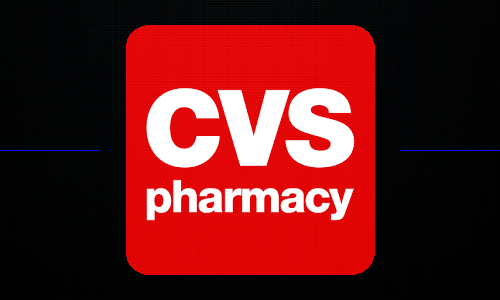

In [8]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

Next, we shall see how we can use text as a watermark. We will convert our image into RGB and save it as a NumPy array. To put a text as a watermark we will be using the put text() function of OpenCV. Here we can use different features like the size of the text, thickness of the text, font family, etc.

In [9]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='CVS pharmacy', org=(w_image - 140, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(100,255,120), thickness=2, lineType=cv2.LINE_4); 

In the above code we can see the put text function in which one is a text parameter that will hold the text that will be inked on the image as the watermark, then the location of the watermark (where it will be present in the image) then the font face parameter which is responsible to give different type and format of text.

To visualize the image we need to convert it back to RGB format.

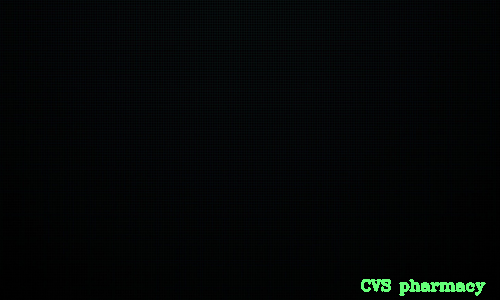

In [10]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg

## Precautions

1. **Image quality:** Be careful about the quality of the image as the lesser will be the quality of the image less it will have an impact on the watermark.

2. **Location of image and text watermark:** Though we have used the standard location for both the image and text watermark still if one wants to change the location then be careful about that as if the location given by you is out of the frame then nothing will be shown.

## Summary

So if we would be like to summarize everything we have done so far here it goes:

1. We imported all the necessary libraries required to build this application
2. Read the image on which we wanted to watermark the logo and name of the company
3. Then we have done all the necessary image processing techniques from changing the color format of the image to writing the text and fixing a logo on the image that we choose in short anything and everything we did on the image is via image processing technique.
4. Then at the end we saw the output which helped us to solve the problem to make the content secure so that it cannot be misused without their license or a paid version along with that the automation part comes at a time savior.